- 34个特征完全缺失
- 以下特征全为单一值，\$screen_width=360, \$importflag=1, \$is_login=0, \$country=中国, \$is_from_background=0或缺失, deposit_rate=‘0.2-2.88’或缺失, financial_rate='0.20-2.88', currentdeposit_type='活期存款'或者缺失 
- distinct_id 与 xwho等价
- $province 与 $city 等价
- 3699个访客
- 97\%的访问用户涉及到3个app_version

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir('D:/Dataset/PRD')

In [9]:
df = pd.read_csv('ark_events_vd.csv',low_memory=False)

In [10]:
df.head()

,distinct_id,xwho,xwhen,xwhat,$os,$utm_campaign_id,$utm_campaign,$utm_medium,$utm_source,$utm_content,...,$user_agent,$language,$is_time_calibrated,$time_zone,$startup_time,$element_name,$url_path,$element_class_name,$element_target_url,ds
0,-9190407076911359000,10004291,1585704134950,$startup,iOS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
1,-9190407076911359000,10004291,1585704701608,$pageview,Android,10000000.0,年中大促,email,官网,优惠信息,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
2,-9190407076911359000,10004291,1585705132137,registclick,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
3,-9190407076911359000,10004291,1585705363953,openaccountprepare,iOS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
4,-9190407076911359000,10004291,1585705407362,$startup,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401


In [95]:
xwhat = df.groupby('xwho')['xwhat'].nunique()

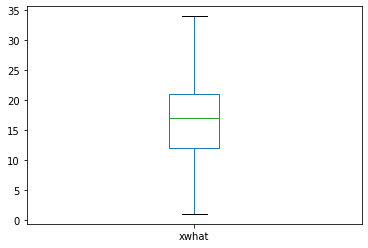

In [97]:
xwhat.plot(kind='box')

In [18]:
nullrate = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

In [25]:
drops = nullrate[nullrate==1]

In [93]:
drops.shape

(34,)

In [21]:
df = df.drop(columns=drops.index)

In [80]:
unique = df.nunique()
drops1 = unique[unique==1]
df = df.drop(columns=drops1.index)

In [81]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

$is_first_time           0.999933
setpassword_taketime     0.999130
setpassword_issuccess    0.999130
openaccount_page         0.998991
$social_share_from       0.998448
                           ...   
$screen_height           0.000000
$carrier_name            0.000000
$is_first_day            0.000000
xwhat_id                 0.000000
distinct_id              0.000000
Length: 110, dtype: float64

In [28]:
df.groupby('distinct_id')['xwho'].nunique().max()

1

In [29]:
df.head()

,distinct_id,xwho,xwhen,xwhat,$os,$utm_campaign_id,$utm_campaign,$utm_medium,$utm_source,$utm_content,...,transfer_direction,coupon_money,coupon_type,financial_money_pay,expire_principal_and_interest,$is_first_time,currentdeposit_money_return,setpassword_issuccess,setpassword_taketime,ds
0,-9190407076911359000,10004291,1585704134950,$startup,iOS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
1,-9190407076911359000,10004291,1585704701608,$pageview,Android,10000000.0,年中大促,email,官网,优惠信息,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
2,-9190407076911359000,10004291,1585705132137,registclick,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
3,-9190407076911359000,10004291,1585705363953,openaccountprepare,iOS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
4,-9190407076911359000,10004291,1585705407362,$startup,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401


In [30]:
from datetime import datetime

In [50]:
pd.Timestamp(1585704701608,unit='ms')

Timestamp('2020-04-01 01:31:41.608000')

In [43]:
df['xwhat'].unique()

array(['$startup', '$pageview', 'registclick', 'openaccountprepare',
       'openaccountidscan', 'openaccountocrstart', '$webstay',
       '$web_click', 'openaccountocrbuttonclick', 'financialpay',
       'signinclick', 'bandcardstart', 'financialbrows', '$end',
       'remittanceweixininfo', 'remittanceweixincode',
       'remittanceweixinresult', 'registsetgesture',
       'currentdepositreturn', 'depositreturn', 'fundtransfer',
       'remittanceinfo', 'remittanceresult', 'accountbalance',
       'currentdepositdraw', 'signinunlock', 'financialexpire',
       'depositbrows', 'depositbuy', 'openaccountocrfinish',
       'openaccountclick', 'bandcardsetfinish', 'registfinish',
       'bandcardinfo', 'bandcardsetpassword'], dtype=object)

In [44]:
drops = nullrate[nullrate>=0.99]
drops.shape

(34,)

In [47]:
df['ds'].unique()

array([20200401, 20200402, 20200403, 20200404, 20200405, 20200406],
      dtype=int64)

In [48]:
df.loc[df['xwho']==10004291,:]

,distinct_id,xwho,xwhen,xwhat,$os,$utm_campaign_id,$utm_campaign,$utm_medium,$utm_source,$utm_content,...,transfer_direction,coupon_money,coupon_type,financial_money_pay,expire_principal_and_interest,$is_first_time,currentdeposit_money_return,setpassword_issuccess,setpassword_taketime,ds
0,-9190407076911359000,10004291,1585704134950,$startup,iOS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
1,-9190407076911359000,10004291,1585704701608,$pageview,Android,10000000.0,年中大促,email,官网,优惠信息,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
2,-9190407076911359000,10004291,1585705132137,registclick,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
3,-9190407076911359000,10004291,1585705363953,openaccountprepare,iOS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
4,-9190407076911359000,10004291,1585705407362,$startup,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
5,-9190407076911359000,10004291,1585705408969,openaccountidscan,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
6,-9190407076911359000,10004291,1585705738708,openaccountocrstart,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
7,-9190407076911359000,10004291,1585705968628,$pageview,Android,NaN,NaN,referral,www.analysys.cn,https://www.analysys.cn/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
8,-9190407076911359000,10004291,1585705973523,$webstay,iOS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
9,-9190407076911359000,10004291,1585706003682,$web_click,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401


In [55]:
first_time = df.loc[df['$is_first_time'].notnull(),:]

In [57]:
x = (first_time.isnull().sum()/first_time.shape[0]).sort_values(ascending=False)

In [58]:
x[x==1]

ocr_buttonclick         1.0
remittance_fee          1.0
$utm_medium             1.0
$element_type           1.0
$page_width             1.0
                       ... 
financial_lasttime      1.0
financial_money_min     1.0
financial_risk_grade    1.0
financial_rate          1.0
financial_type          1.0
Length: 83, dtype: float64

In [59]:
first_time.drop(columns=x[x==1].index)

,distinct_id,xwho,xwhen,xwhat,$os,$channel,$platform,$session_id,offset,xwhat_id,...,$importflag,$goods,$app_version,$is_login,$country,$province,$city,$is_from_background,$is_first_time,ds
21360,1801693983752224770,10012833,1585697162862,$startup,Android,官网,JS,70a2c0bf979e648c6a542c9888d507a6,865700,15,...,1,[外汇],V1.0,0,中国,上海,上海,0.0,1.0,20200401
22106,4312550326224347600,10012834,1585710049979,$startup,Android,官网,JS,c82457b7972d6e440440a499670d8dc1,2750400,15,...,1,[理财],V1.2,0,中国,四川,成都,0.0,1.0,20200401
36639,5826851028954090500,10012832,1585686783010,$startup,Android,官网,JS,848a728d3fb97b55e937b8dbb0d7c34c,476500,15,...,1,"[理财, 股票, 外汇, 基金]",V1.1,0,中国,北京,北京,0.0,1.0,20200401
72023,7573291496992943100,10012837,1585819823095,$startup,Android,微信,Android,b91ac844001be8a654b7b90e2d76d2fe,16897300,15,...,1,"[理财, 股票, 外汇, 存款]",V1.1,0,中国,浙江,杭州,0.0,1.0,20200402
88594,-8417358227795726300,10012840,1585854279572,$startup,iOS,百度,WeChat,23fc5c6c8f97d8dbd1282706c5cc9a53,21691500,15,...,1,"[理财, 股票, 外汇, 存款]",V1.1,0,中国,广东,深圳,0.0,1.0,20200403
121574,1641476821159828740,10012839,1585853256898,$startup,Android,官网,JS,34995de8d6396c74d3364b7d92d5fac9,21645200,15,...,1,"[理财, 股票, 外汇, 基金, 存款]",V1.0,0,中国,北京,北京,0.0,1.0,20200403
127878,7330637390230288400,10012842,1585853343312,$startup,Android,百度,Android,4f0b79fdc145ecd191d7d839c089b090,21649700,15,...,1,"[理财, 股票, 外汇, 基金, 存款]",V1.0,0,中国,上海,上海,0.0,1.0,20200403
132607,-8163270696146351100,10012845,1585954568301,$startup,Android,百度,JS,99fa34898f3a7fcc30aee8294e37a7dd,33967500,15,...,1,"[理财, 股票, 外汇, 基金, 存款]",V1.1,0,中国,浙江,杭州,0.0,1.0,20200404
145438,6299727127751584800,10012843,1586005859214,$startup,Android,百度,JS,337341d28cbb4f1e7eb116c409a96778,39359500,15,...,1,[基金],V1.0,0,中国,四川,成都,0.0,1.0,20200404
155917,7330637390230288400,10012842,1585948197469,$startup,Android,百度,JS,b30658aba88484ed642b290a1a799739,33809500,15,...,1,"[股票, 外汇, 基金, 存款]",V1.2,0,中国,北京,北京,0.0,0.0,20200404


In [99]:
df.groupby('$utm_campaign')['xwho'].nunique()

13260

In [84]:
 df.groupby('$city')['xwho'].nunique()

$city
上海    3382
北京    3498
成都    3367
杭州    3519
武汉    3480
深圳    3626
郑州    3591
Name: xwho, dtype: int64

In [86]:
 df.groupby('ds')['xwho'].nunique()

ds
20200401    1377
20200402    1317
20200403    1505
20200404     931
20200405     606
20200406      29
Name: xwho, dtype: int64

In [88]:
pd.Timestamp(df['xwhen'].max(),unit='ms')

Timestamp('2020-04-06 15:58:49.084000')

In [101]:
df.groupby('$channel')['xwho'].nunique()/3699

$channel
今日头条    0.948905
官网      0.991079
微信      0.986483
百度      0.972966
知乎      0.870506
Name: xwho, dtype: float64

In [102]:
guanwang = df.loc[df['$channel']=='官网',:]

In [107]:
guanwang.head()

,distinct_id,xwho,xwhen,xwhat,$os,$utm_campaign_id,$utm_campaign,$utm_medium,$utm_source,$utm_content,...,transfer_direction,coupon_money,coupon_type,financial_money_pay,expire_principal_and_interest,$is_first_time,currentdeposit_money_return,setpassword_issuccess,setpassword_taketime,ds
0,-9190407076911359000,10004291,1585704134950,$startup,iOS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
1,-9190407076911359000,10004291,1585704701608,$pageview,Android,10000000.0,年中大促,email,官网,优惠信息,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
3,-9190407076911359000,10004291,1585705363953,openaccountprepare,iOS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
4,-9190407076911359000,10004291,1585705407362,$startup,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401
9,-9190407076911359000,10004291,1585706003682,$web_click,Android,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200401


In [108]:
df['$app_version'].unique()

array(['V1.0', 'V1.2', 'V1.1'], dtype=object)

In [109]:
df.groupby('$app_version')['xwho'].nunique()

$app_version
V1.0    3680
V1.1    3666
V1.2    3633
Name: xwho, dtype: int64

In [114]:
df.groupby('xwho')['$app_version'].nunique().value_counts()/3699

3    0.972695
2    0.022709
1    0.004596
Name: $app_version, dtype: float64